# Lead Score Case Study

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## 1. Load The Dataset

In [1]:
# importing necessary libraries
# Data Analysis & Data wrangling
import numpy as np
import pandas as pd
import missingno as mn
from random import sample
from numpy.random import uniform
from math import isnan

# Static Visualization
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import matplotlib.cm as cm
%matplotlib inline

# Plot Style

style.use('fivethirtyeight')

# Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go
from plotly.tools import FigureFactory as FF
from plotly import tools
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
from IPython.display import display, HTML
init_notebook_mode(connected=True)

# Machine Learning Libraries

#Sci-kit learn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [4]:
# Load and read the data
lead = pd.read_csv("Leads.csv")
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [5]:
lead.tail()

Prospect ID  Lead Number  \
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
9235  Landing Page Submission  Direct Traffic          Yes          No   
9236  Landing Page Submission  Direct Traffic           No          No   
9237  Landing Page Submission  Direct Traffic          Yes          No   
9238  Landing Page Submission          Google           No          No   
9239  Landing Page Submission  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit      Last Activity       Country  \
9235                  2.67  Email Marked Spam  Saudi Arabia   
9236                  2.00           SMS Sent         India   
9237                  2.00           SMS Sent         India   
9238                  3.00           SMS Sent         India   
9239                  3.00           SMS Sent    Bangladesh   

                 Specialization How did you hear about X Education  \
9235     IT Projects Management                             Select   
9236      Media and Advertising                             Select   
9237    Business Administration                             Select   
9238  Human Resource Management                      Online Search   
9239    Supply Chain Management                             Select   

     What is your current occupation  \
9235                      Unemployed   
9236                      Unemployed   
9237                      Unemployed   
9238                             NaN   
9239                      Unemployed   

     What matters most to you in choosing a course Search Magazine  \
9235                       Better Career Prospects     No       No   
9236                       Better Career Prospects     No       No   
9237                       Better Career Prospects     No       No   
9238                                           NaN     No       No   
9239                       Better Career Prospects     No       No   

     Newspaper Article X Education Forums Newspaper Digital Advertisement  \
9235                No                 No        No                    No   
9236                No                 No        No                    No   
9237                No                 No        No                    No   
9238                No                 No        No                    No   
9239                No                 No        No                    No   

     Through Recommendations Receive More Updates About Our Courses  \
9235                      No                                     No   
9236                      No                                     No   
9237                      No                                     No   
9238                      No                                     No   
9239                      No                                     No   

                                     Tags       Lead Quality  \
9235  Will revert after reading the email  High in Relevance   
9236                   wrong number given           Might be   
9237                       invalid number           Not Sure   
9238                                  NaN                NaN   
9239  Will revert after reading the email           Might be   

     Update me on Supply Chain Content Get updates on DM Content  \
9235                                No                     

In [6]:
# Data dictionary
word=pd.read_excel(r"Leads Data Dictionary.xlsx")
word.head()

Unnamed: 0   Unnamed: 1                                         Unnamed: 2
0         NaN          NaN                                                NaN
1         NaN    Variables                                        Description
2         NaN  Prospect ID  A unique ID with which the customer is identif...
3         NaN  Lead Number      A lead number assigned to each lead procured.
4         NaN  Lead Origin  The origin identifier with which the customer ...

In [7]:
pd.set_option('display.max_colwidth', -1)
word.drop('Unnamed: 0',inplace=True,axis=1)
word.columns = word.iloc[1]
word = word.iloc[2:]
word.reset_index(drop=True, inplace=True)
word.head(len(word))


1                                          Variables  \
0   Prospect ID                                        
1   Lead Number                                        
2   Lead Origin                                        
3   Lead Source                                        
4   Do Not Email                                       
5   Do Not Call                                        
6   Converted                                          
7   TotalVisits                                        
8   Total Time Spent on Website                        
9   Page Views Per Visit                               
10  Last Activity                                      
11  Country                                            
12  Specialization                                     
13  How did you hear about X Education                 
14  What is your current occupation                    
15  What matters most to you in choosing this course   
16  Search                                             
17  Magazine                                           
18  Newspaper Article                                  
19  X Education Forums                                 
20  Newspaper                                          
21  Digital Advertisement                              
22  Through Recommendations                            
23  Receive More Updates About Our Courses             
24  Tags                                               
25  Lead Quality                                       
26  Update me on Supply Chain Content                  
27  Get updates on DM Content                          
28  Lead Profile                                       
29  City                                               
30  Asymmetrique Activity Index                        
31  Asymmetrique Profile Index                         
32  Asymmetrique Activity Score                        
33  Asymmetrique Profile Score                         
34  I agree to pay the amount through cheque           
35  a free copy of Mastering The Interview             
36  Last Notable Activity                              

1                                                                                                                                                                         Description  
0   A unique ID with which the customer is identified.                                                                                                                                 
1   A lead number assigned to each lead procured.                                                                                                                                      
2   The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.                                                             
3   The source of the lead. Includes Google, Organic Search, Olark Chat, etc.                                                                                                          
4   An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.                                                 
5   An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.                                                  
6   The target variable. Indicates whether a lead has been successfully converted or not.                                                                                              
7   The total number of visits made by the customer on the website.                                                                                                                    
8   The total time spent by the customer on the website.                                                                                                                               
9   Average number of pages on 

In [8]:
# dimensions of data
lead.shape

(9240, 37)

In [9]:
# checking the null values and data types
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [10]:
lead_dub = lead.copy()

# Checking for duplicates and dropping the entire duplicate row if any
lead_dub.drop_duplicates(subset=None, inplace=True)
lead_dub.shape

(9240, 37)

In [11]:
lead.shape

(9240, 37)

## 2. Clean And Convert The Data

In [12]:
# Converting 'Select' values to NaN.
lead = lead.replace('Select', np.nan)
lead = lead.replace('select', np.nan)
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620  660737       API                       
1  2a272436-5132-4136-86fa-dcc88c88f482  660728       API                       
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  660727       Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  660719       Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  660681       Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0  Olark Chat      No           No          0          0.0           
1  Organic Search  No           No          0          5.0           
2  Direct Traffic  No           No          1          2.0           
3  Direct Traffic  No           No          0          1.0           
4  Google          No           No          1          2.0           

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0  0                            0.0                   Page Visited on Website   
1  674                          2.5                   Email Opened              
2  1532                         2.0                   Email Opened              
3  305                          1.0                   Unreachable               
4  1428                         1.0                   Converted to Lead         

  Country           Specialization How did you hear about X Education  \
0  NaN     NaN                      NaN                                 
1  India   NaN                      NaN                                 
2  India   Business Administration  NaN                                 
3  India   Media and Advertising    Word Of Mouth                       
4  India   NaN                      Other                               

  What is your current occupation  \
0  Unemployed                       
1  Unemployed                       
2  Student                          
3  Unemployed                       
4  Unemployed                       

  What matters most to you in choosing a course Search Magazine  \
0  Better Career Prospects                       No     No        
1  Better Career Prospects                       No     No        
2  Better Career Prospects                       No     No        
3  Better Career Prospects                       No     No        
4  Better Career Prospects                       No     No        

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0  No                No                 No        No                     
1  No                No                 No        No                     
2  No                No                 No        No                     
3  No                No                 No        No                     
4  No                No                 No        No                     

  Through Recommendations Receive More Updates About Our Courses  \
0  No                      No                                      
1  No                      No                                      
2  No                      No                                      
3  No                      No                                      
4  No                      No                                      

                                  Tags      Lead Quality  \
0  Interested in other courses          Low in Relevance   
1  Ringing                              NaN                
2  Will revert after reading the email  Might be           
3  Ringing                              Not Sure           
4  Will revert after reading the email  Might be           

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0  No                                No                        NaN              
1  No                                No                        NaN              
2  No                                No                        Potential Lead   
3  No                        

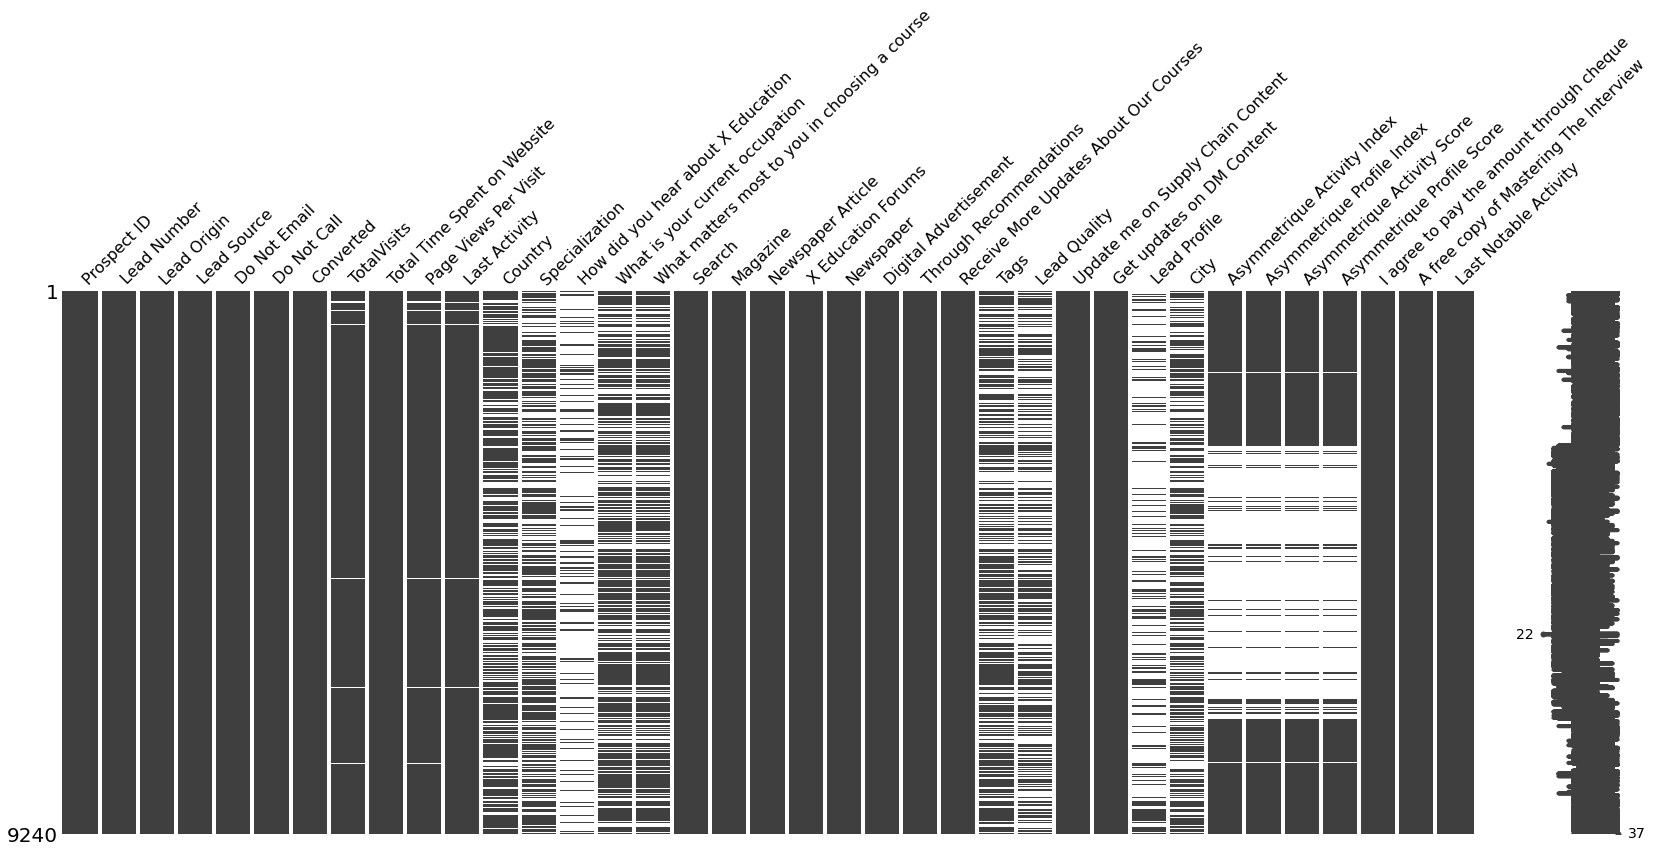

In [13]:
# Null Value Visualization
mn.matrix(lead)

In [14]:
# Percentage of null values in each column
null_perc = lead.isnull().sum()/len(lead)*100
null_perc.sort_values(ascending = False).head(50)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                      1.482684 
Page Views Per Visit                             1.482684 
Last Activity                                    1.114719 
Lead Source                                      0.38961

In [15]:
# List of Columns & NA counts where NA values are more than 45%
NA_col = lead.isnull().sum().sort_values(ascending = False)
NA_col = NA_col[NA_col.values >(0.45*len(lead))]
NA_col.iplot(kind='bar', xTitle = 'Organization Name', yTitle = "Count", title = 'Cloumns with more than 45% of null/missing values', color = '#4CB391')

We will remove those columns that has null values greater than 45%

In [16]:
# Removing columns with null values greater than 45%
cols=lead.columns
for i in cols:
    if((100*(lead[i].isnull().sum()/len(lead.index))) >= 45):
        lead.drop(i, 1, inplace = True)


In [17]:
# Number of columns remaining
len(lead.columns)

30

In [18]:
# Re checking % of null values in each column 
null_perc = lead.isnull().sum()/len(lead)*100
null_perc.sort_values(ascending = False).head(50)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                      1.482684 
Page Views Per Visit                             1.482684 
Last Activity                                    1.114719 
Lead Source                                      0.389610 
Lead Number                                      0.000000 
Lead Origin                                      0.000000 
Do Not Email                                     0.000000 
Do Not Call                                      0.000000 
Converted                                        0.000000 
Total Time Spent on Website                      0.000000 
Last Notable Activity                            0.00000

- Let us check the count of each values in categorical columns 

In [19]:
# Value count of City column
lead.City.value_counts(normalize=True,dropna=False)

NaN                            0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [20]:
# Replcaing NaN in City column with mode
lead['City'] = lead['City'].replace(np.nan, 'Mumbai')
lead.City.value_counts(normalize=True,dropna=False)

Mumbai                         0.745779
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [21]:
# Plotting the value counts of City column
colors = ['lightslategray'] * 10


fig = go.Figure(data=[go.Histogram(histfunc="count",
    x=lead["City"].sort_values(ascending = True).values,
    marker_color=colors 
)])
fig.update_layout(title_text='Count of Cities')
fig.show()

In [22]:
# Value count of Specialization column
lead.Specialization.value_counts(normalize=True,dropna=False)

NaN                                  0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Media and Advertising                0.021970
Travel and Tourism                   0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [23]:
# Replcaing NaN in Specialization column as Others
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Others')

In [24]:
# combining all Management specialization
lead['Specialization'] = lead['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management') 

In [25]:
# Plotting the value counts of Specialization column
colors = ['lightslategray'] * 20

fig = go.Figure(data=[go.Histogram(histfunc="count",
    x=lead["Specialization"].sort_values(ascending = True).values,
    marker_color=colors 
)])
fig.update_layout(title_text='Count of Specializations')
fig.show()

In [26]:
# Value count of Tags column
lead['Tags'].value_counts(normalize=True,dropna=False)

NaN                                                  0.362879
Will revert after reading the email                  0.224242
Ringing                                              0.130195
Interested in other courses                          0.055519
Already a student                                    0.050325
Closed by Horizzon                                   0.038745
switched off                                         0.025974
Busy                                                 0.020130
Lost to EINS                                         0.018939
Not doing further education                          0.015693
Interested  in full time MBA                         0.012662
Graduation in progress                               0.012013
invalid number                                       0.008983
Diploma holder (Not Eligible)                        0.006818
wrong number given                                   0.005087
opp hangup                                           0.003571
number n

In [27]:
# Replcaing NaN in Tags column as Unknown
lead['Tags'] = lead['Tags'].replace(np.nan,'Unknown')

In [28]:
# combining low frequency values
lead['Tags'] = lead['Tags'].replace(['invalid number','Diploma holder (Not Eligible)', 'wrong number given',
                                   'opp hangup ','number not provided','in touch with EINS','Lost to Others','Still Thinking',
                                     'Want to take admission but has financial problems','In confusion whether part time or DLP',
                                     'Interested in Next batch','Lateral student','University not recognized',
                                     'Shall take in the next coming month','Recognition issue (DEC approval)'] ,'Other_Tags') 

In [29]:
# Plotting the value counts of Tags column
colors = ['lightslategray'] * 20

fig = go.Figure(data=[go.Histogram(histfunc="count",
    x=lead["Tags"].sort_values(ascending = True).values,
    marker_color=colors 
)])
fig.update_layout(title_text='Tags')
fig.show()

In [30]:
# Value count of 'What matters most to you in choosing a course' column
lead['What matters most to you in choosing a course'].value_counts(normalize=True,dropna=False)

Better Career Prospects      0.706494
NaN                          0.293182
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

In [31]:
# Replcaing NaN in 'What matters most to you in choosing a course' column with mode
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [32]:
# Plotting the value counts of 'What matters most to you in choosing a course' column
colors = ['lightslategray'] * 20

fig = go.Figure(data=[go.Histogram(histfunc="count",
    x=lead["What matters most to you in choosing a course"].sort_values(ascending = True).values,
    marker_color=colors 
)])
fig.update_layout(title_text='What matters most to you in choosing a course')
fig.show()

- As we can see above 'What matters most tot you in choosing a course' column is higly skewed and is not required for modelling

In [33]:
# columns to drop
cols_to_drop = ['What matters most to you in choosing a course']

In [34]:
# Value count of 'What is your cuurent occupation' column
lead['What is your current occupation'].value_counts(normalize=True,dropna=False)


Unemployed              0.606061
NaN                     0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [35]:
# Replcaing NaN in 'What is your current occupation' column with mode
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed')

In [36]:
# Plotting the value counts of 'What is your current occupation' column
im = lead['What is your current occupation'].value_counts()
df = pd.DataFrame({'labels': im.index,'values': im.values})
df.iplot(kind='pie',labels='labels',values='values', title='What is your current occupation', hole = 0.5, colors=['#63D7CF','#FD7B80', '#FCBF8A', '#F7EDCD'])

In [37]:
# Value count of Country column
lead['Country'].value_counts(normalize=True,dropna=False)

India                   0.702597
NaN                     0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Hong Kong               0.000758
Bahrain                 0.000758
France                  0.000649
Oman                    0.000649
unknown                 0.000541
Canada                  0.000433
Germany                 0.000433
South Africa            0.000433
Nigeria                 0.000433
Kuwait                  0.000433
Sweden                  0.000325
Netherlands             0.000216
Ghana                   0.000216
Belgium                 0.000216
China                   0.000216
Philippines             0.000216
Italy                   0.000216
Bangladesh              0.000216
Uganda                  0.000216
Asia/Pacific Region     0.000216
Liberia                 0.000108
Russia    

In [38]:
# Replcaing NaN in Country column with mode
lead['Country'] = lead['Country'].replace(np.nan, 'India')

In [39]:
# Plotting the value counts of Country column
colors = ['lightslategray'] * 20

fig = go.Figure(data=[go.Histogram(histfunc="count",
    x=lead["Country"].sort_values(ascending = True).values,
    marker_color=colors 
)])
fig.update_layout(title_text='Country')
fig.show()

- We can see that Country column is highly skewed and is not required for modelling

In [40]:
cols_to_drop.append('Country')
cols_to_drop

['What matters most to you in choosing a course', 'Country']

In [41]:
# Re-checking % of null values in each column
null_perc = lead.isnull().sum()/len(lead)*100
null_perc.sort_values(ascending = False).head(50)

TotalVisits                                      1.482684
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Lead Source                                      0.389610
Last Notable Activity                            0.000000
A free copy of Mastering The Interview           0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
Total Time Spent on Website                      0.000000
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine      

In [42]:
# Value count of Lead Source column
lead['Lead Source'].value_counts(normalize=True,dropna=False)

Google               0.310390
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
NaN                  0.003896
bing                 0.000649
google               0.000541
Click2call           0.000433
Live Chat            0.000216
Press_Release        0.000216
Social Media         0.000216
testone              0.000108
NC_EDM               0.000108
blog                 0.000108
Pay per Click Ads    0.000108
welearnblog_Home     0.000108
WeLearn              0.000108
youtubechannel       0.000108
Name: Lead Source, dtype: float64

In [43]:
#replacing Nan Values as Others and combining low frequency values
lead['Lead Source'] = lead['Lead Source'].replace(np.nan,'Others')
lead['Lead Source'] = lead['Lead Source'].replace('google','Google')
lead['Lead Source'] = lead['Lead Source'].replace(['Facebook','youtubechannel'],'Social Media')
lead['Lead Source'] = lead['Lead Source'].replace(['bing','Click2call','Press_Release','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')

In [44]:
# Plotting the value counts of 'Lead Source' column
colors = ['lightslategray'] * 20

fig = go.Figure(data=[go.Histogram(histfunc="count",
    x=lead["Lead Source"].sort_values(ascending = True).values,
    marker_color=colors 
)])
fig.update_layout(title_text='Lead Source')
fig.show()

In [45]:
# Value count of Last Activity column
lead['Last Activity'].value_counts(normalize=True,dropna=False)

Email Opened                    0.371970
SMS Sent                        0.297078
Olark Chat Conversation         0.105303
Page Visited on Website         0.069264
Converted to Lead               0.046320
Email Bounced                   0.035281
Email Link Clicked              0.028896
Form Submitted on Website       0.012554
NaN                             0.011147
Unreachable                     0.010065
Unsubscribed                    0.006602
Had a Phone Conversation        0.003247
Approached upfront              0.000974
View in browser link Clicked    0.000649
Email Marked Spam               0.000216
Email Received                  0.000216
Resubscribed to emails          0.000108
Visited Booth in Tradeshow      0.000108
Name: Last Activity, dtype: float64

In [46]:
# Replcaing NaN in Last Acticity column as others and combing low frequency values
lead['Last Activity'] = lead['Last Activity'].replace(np.nan,'Others')
lead['Last Activity'] = lead['Last Activity'].replace(['Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [47]:
# Plotting the value counts of Last Activity column
colors = ['lightslategray'] * 20

fig = go.Figure(data=[go.Histogram(histfunc="count",
    x=lead["Last Activity"].sort_values(ascending = True).values,
    marker_color=colors 
)])
fig.update_layout(title_text='Last Activity')
fig.show()

In [48]:
# Re-checking % of null values in each column
null_perc = lead.isnull().sum()/len(lead)*100
null_perc.sort_values(ascending = False).head(50)

TotalVisits                                      1.482684
Page Views Per Visit                             1.482684
Last Notable Activity                            0.000000
A free copy of Mastering The Interview           0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.000000
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
Total Time Spent on Website                      0.000000
Last Activity                                    0.000000
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine      

- We shall drop the remaining rows that has null values

In [49]:
# Drop rows with null values
lead.dropna(inplace = True)

In [50]:
# Checking the dimension of new data
lead.shape

(9103, 30)

- It is observed that not much of the data is lost after dropping rows with null values

In [51]:
# Value count of 'Last Notable Activity' column
lead['Last Notable Activity'].value_counts(normalize=True,dropna=False)

Modified                        0.359222
Email Opened                    0.310557
SMS Sent                        0.238603
Page Visited on Website         0.034934
Olark Chat Conversation         0.020103
Email Link Clicked              0.019005
Email Bounced                   0.006591
Unsubscribed                    0.005163
Unreachable                     0.003515
Had a Phone Conversation        0.001538
Email Marked Spam               0.000220
Resubscribed to emails          0.000110
Form Submitted on Website       0.000110
View in browser link Clicked    0.000110
Approached upfront              0.000110
Email Received                  0.000110
Name: Last Notable Activity, dtype: float64

In [52]:
#clubbing lower frequency values
lead['Last Notable Activity'] = lead['Last Notable Activity'].replace(['Email Bounced', 'Unreachable',
                                                                       'Unsubscribed','Had a Phone Conversation',
                                                                       'Email Marked Spam','Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

In [53]:
# Plotting the value counts of 'Last Notable Activity' column
colors = ['lightslategray'] * 20

fig = go.Figure(data=[go.Histogram(histfunc="count",
    x=lead["Last Notable Activity"].sort_values(ascending = True).values,
    marker_color=colors 
)])
fig.update_layout(title_text='Last Notable Activity')
fig.show()

In [54]:
# Value count of Lead Origin column
lead['Lead Origin'].value_counts(normalize=True,dropna=False)

Landing Page Submission    0.536746
API                        0.393057
Lead Add Form              0.066791
Lead Import                0.003405
Name: Lead Origin, dtype: float64

In [55]:
# Plotting the value counts of Lead Origin column
colors = ['lightslategray'] * 20

fig = go.Figure(data=[go.Histogram(histfunc="count",
    x=lead["Lead Origin"].sort_values(ascending = True).values,
    marker_color=colors 
)])
fig.update_layout(title_text='Lead origin')
fig.show()

In [56]:
# Value count of 'A free copy of Mastering The Interview' column
lead['A free copy of Mastering The Interview'].value_counts(normalize=True,dropna=False)

No     0.682742
Yes    0.317258
Name: A free copy of Mastering The Interview, dtype: float64

In [57]:
# Plotting the value counts of 'A free copy of Mastering The Interview' column
colors = ['lightslategray'] * 20

fig = go.Figure(data=[go.Histogram(histfunc="count",
    x=lead["A free copy of Mastering The Interview"].sort_values(ascending = True).values,
    marker_color=colors 
)])
fig.update_layout(title_text='A free copy of Mastering The Interview')
fig.show()

In [58]:
# Printing value counts for each column to check for skewness in them
cols= lead.columns
def unicato(feature):
    temp_count = lead[feature].value_counts()
    temp_perc = lead[feature].value_counts(normalize = True,dropna=False)
    print(feature)
    print(temp_perc)
    print('\n')

In [59]:
for i in cols:
    unicato(i)

Prospect ID
848fef69-c5fe-4973-839e-863307cdc5bb    0.00011
4ab62028-d807-47ce-93b1-b7e8ed092d8a    0.00011
2017c47d-9675-4cd8-84f3-479c992ab463    0.00011
8a1d6f50-3bf6-414e-99ae-6494b1d29b24    0.00011
6fdf9684-2da4-4b40-9346-5b5009c820fc    0.00011
                                         ...   
3206cfc9-7769-441e-951b-c91a9e6663a2    0.00011
9a0a3dcc-6e20-4f73-ae6e-61f767148b80    0.00011
bebe9383-c396-4224-ad35-463c4bcb7046    0.00011
927866c7-4b30-4819-94a1-222d9d4638a6    0.00011
c591dd12-ebb4-4bc7-9421-a105cbb9def5    0.00011
Name: Prospect ID, Length: 9103, dtype: float64


Lead Number
608255    0.00011
652580    0.00011
646449    0.00011
588514    0.00011
648494    0.00011
           ...   
584408    0.00011
631513    0.00011
639709    0.00011
582137    0.00011
655360    0.00011
Name: Lead Number, Length: 9103, dtype: float64


Lead Origin
Landing Page Submission    0.536746
API                        0.393057
Lead Add Form              0.066791
Lead Import                0.0

- We shall drop all those categorical columns which are heavily skewed

In [60]:
# Categorical columns that are heavily skewed
cols_to_drop.extend(['Do Not Email', 'Do Not Call','Search','Magazine','Newspaper Article', 'X Education Forums', 'Newspaper', 
                     'Digital Advertisement', 
                     'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
                     'Get updates on DM Content', 'I agree to pay the amount through cheque'])

In [61]:
cols_to_drop

['What matters most to you in choosing a course',
 'Country',
 'Do Not Email',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [62]:
# dropping columns that are heavily skewed
lead.drop(cols_to_drop, 1, inplace = True)
len(lead.columns)

15

# 3. EDA

In [63]:
# Conversion Ratio
im = lead['Converted'].value_counts()
df = pd.DataFrame({'labels': ['No', 'Yes'],'values': im.values})
df.iplot(kind='pie',labels='labels',values='values', title='Conversion Ratio', hole = 0.5, colors=['#FD7B80','#63D7CF','#FD7B80', '#FCBF8A', '#F7EDCD'])

- Around 38% is the conversion rate

In [64]:
def unicat(feature,label_rotation=False,horizontal_layout=True):
    
    cat_perc = lead[[feature, 'Converted']].groupby([feature],as_index=False).mean()
    cat_perc["Converted"] = cat_perc["Converted"]*100
    cat_perc.sort_values(by='Converted', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))   

    sns.set_palette("Set2")
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=lead,
                    hue ="Converted",
                    order=cat_perc[feature],
                    palette=['#FD7B80','#63D7CF'])


    ax1.set_title(feature, fontdict={'fontsize' : 15, 'fontweight' : 5}) 
    ax1.legend(['Not Converted','Converted'])
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='Converted', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='rainbow')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Converted leads [%]', fontsize=15)
    plt.xlabel(feature,fontsize=15) 
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + "( Converted % )", fontdict={'fontsize' : 15, 'fontweight' : 5}) 

    plt.show();

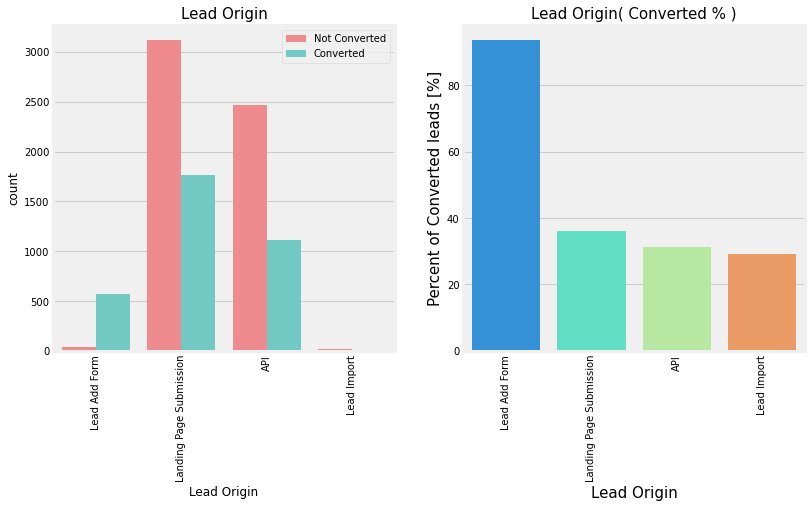

In [65]:
# Plotting value counts and % of conversion of each value in Lead Origin Column
unicat("Lead Origin",label_rotation=True)

- 'Landing Page Submission' has highest number of conversion
- 'Lead Add Form' has highest conversion % in Lead Origin column

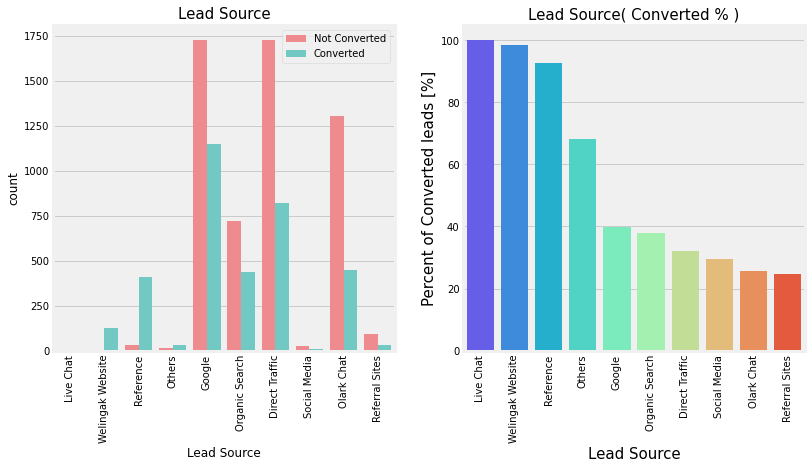

In [66]:
# Plotting value counts and % of conversion of each value in Lead Source Column
unicat("Lead Source",label_rotation=True)

- 'Google' has highest number of conversion.
- 'Live Chat' has highest conversion % in Lead Soruce column

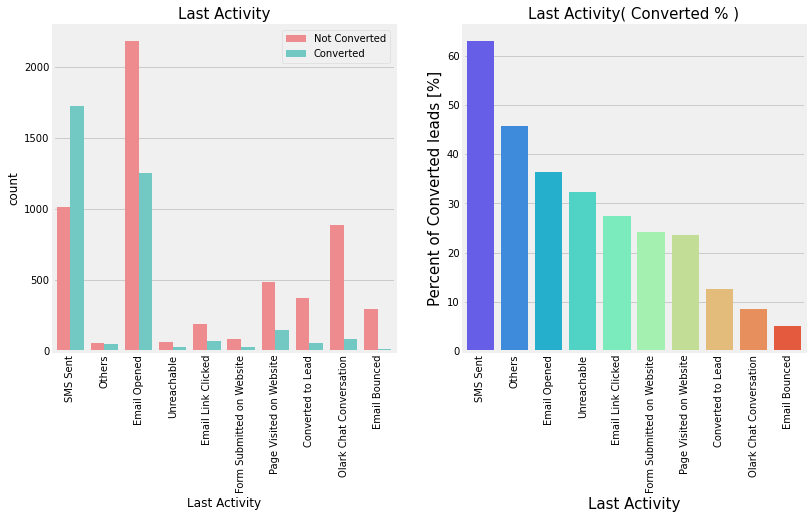

In [67]:
# Plotting value counts and % of conversion of each value in Last Activity Column
unicat("Last Activity",label_rotation=True)

- 'SMS Sent' has highest number of conversion and highest conversion % in Last Activity column

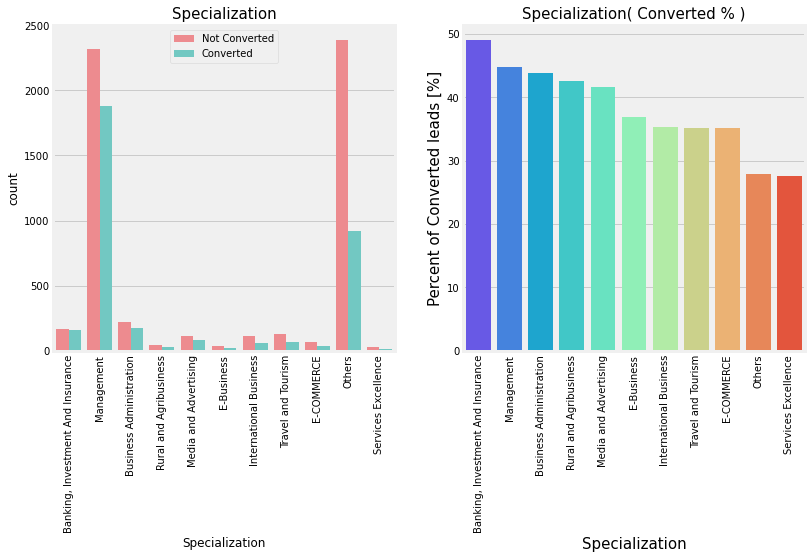

In [68]:
# Plotting value counts and % of conversion of each value in Specialization Column
unicat("Specialization",label_rotation=True)

- 'Management' has highest number of conversion
- 'Banking, Investment And Insurance' has highest conversion % in Specialization column

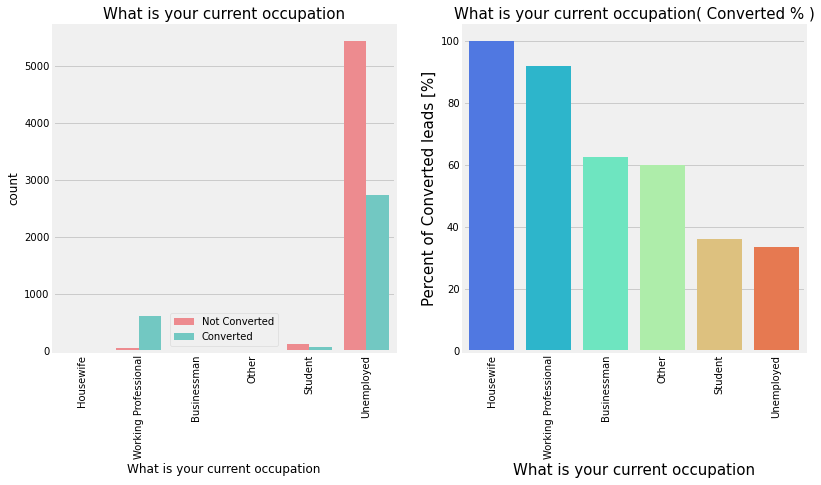

In [69]:
# Plotting value counts and % of conversion of each value in 'What is your current occupation' Column
unicat("What is your current occupation",label_rotation=True)

- 'Unemployed' has highest number of conversion
- 'Housewife' has highest conversion % in 'What is your current occupation' column

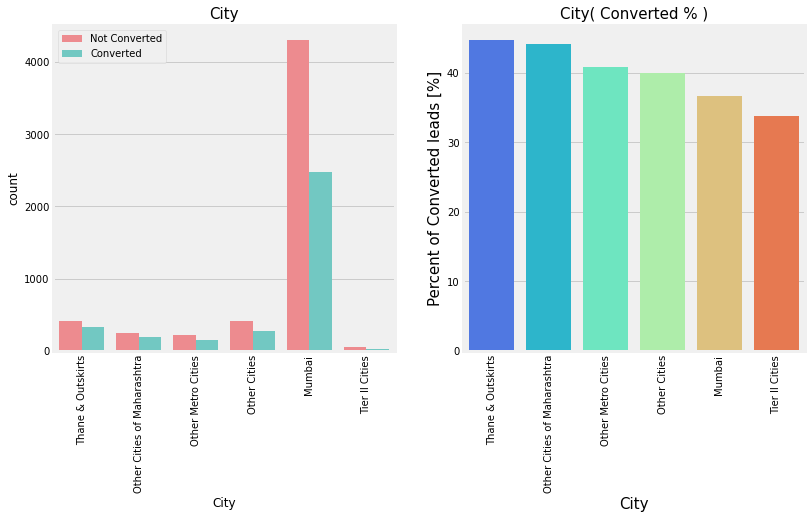

In [70]:
# Plotting value counts and % of conversion of each value in City Column
unicat("City",label_rotation=True)

- 'Mumbai' has highest number of conversion
- 'Thane & Outskirts' has highest % of conversion in City column

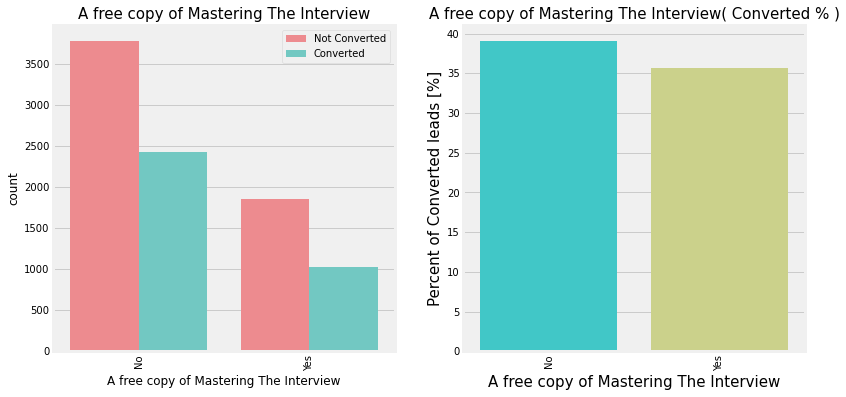

In [71]:
# Plotting value counts and % of conversion of each value in 'A free copy of Mastering The Interview' Column
unicat("A free copy of Mastering The Interview",label_rotation=True)

- 'No' has highest number of conversion and highest conversion % in 'A free copy of Mastering The Interview' Column

In [72]:
# Function for visualizing the distribution of numerical columns
def uni(df,col,v,hue =None):

    sns.set(style="darkgrid")
    
    if v == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0], color="#4FAAA7")
        plt.yscale('log')
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile", color="#9DE4AC")
        plt.yscale('log')
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v', color="#CBFC53")
        plt.yscale('log')
    
    if v == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, color="#4CB391", order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

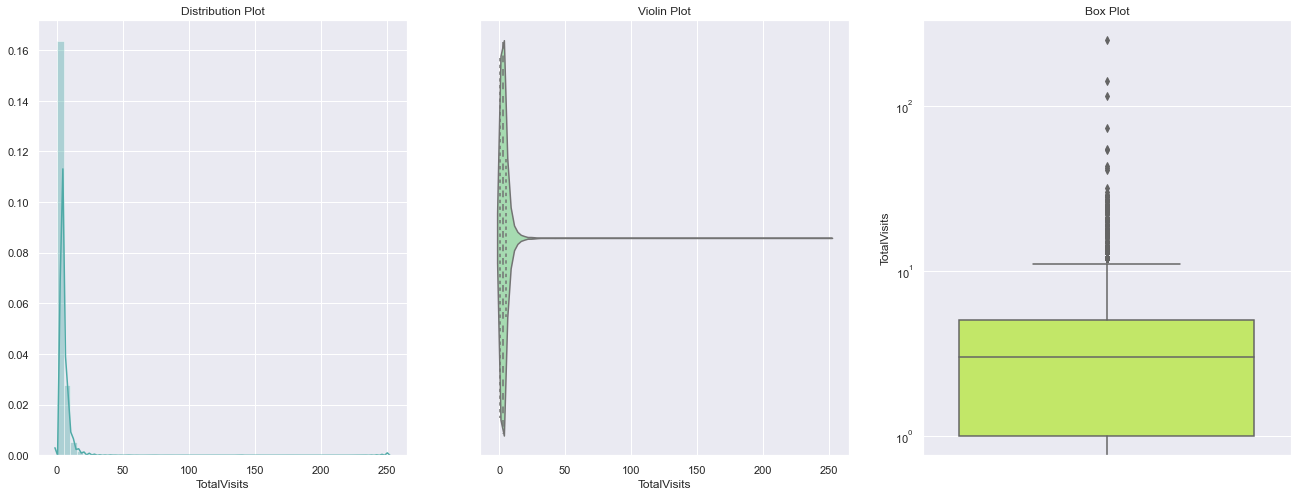

In [73]:
# Distribution of TotalVisits column
uni(df=lead,col='TotalVisits',v=0)

- We see some outliers in TotalVisits Column

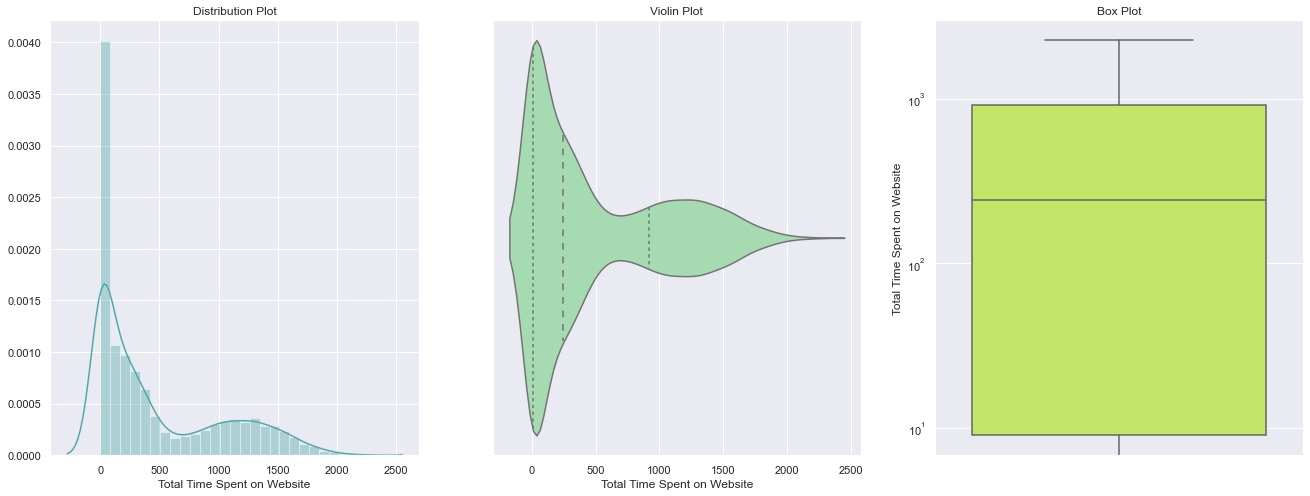

In [74]:
#Distribution of 'Total Time Spent on Websit'
uni(df=lead,col='Total Time Spent on Website',v=0)

- There are no outliers seen in 'Total Time Spent on Website' column

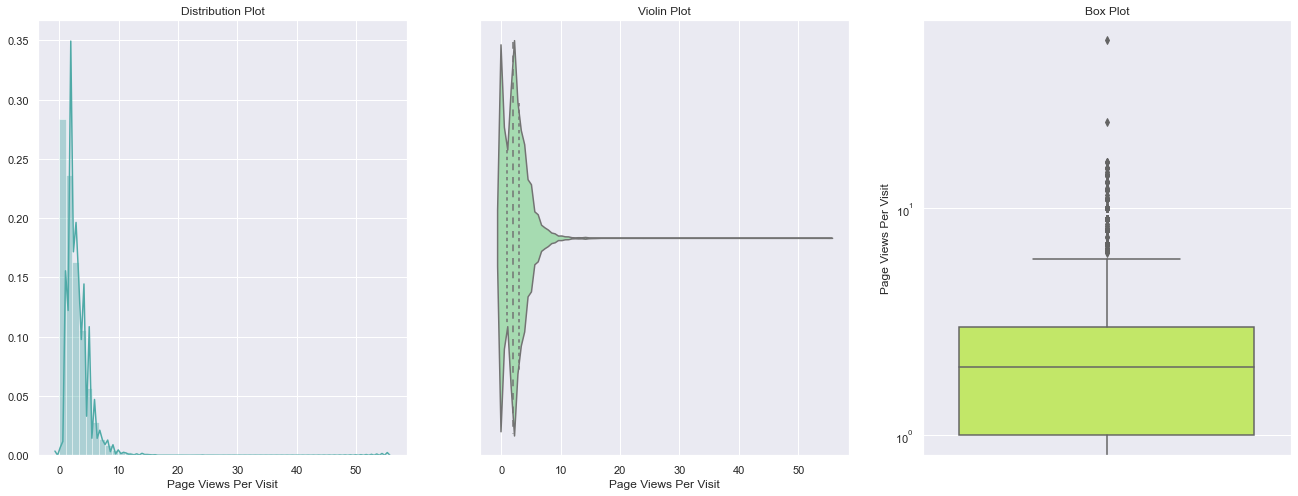

In [75]:
# Distribution of 'Page Views Per Visit'
uni(df=lead,col='Page Views Per Visit',v=0)

- There are few outliers observerd in 'Page Views Per Visit' column

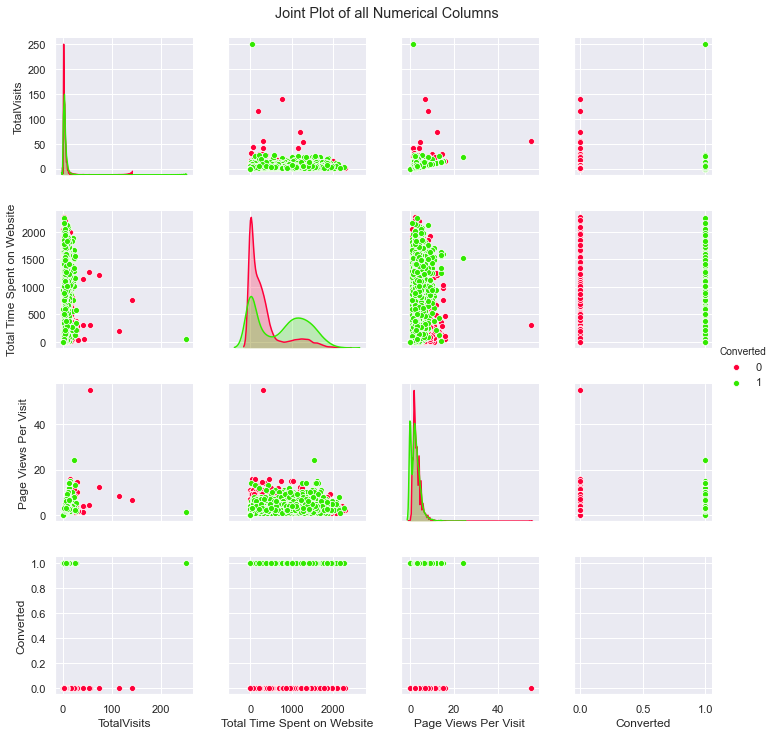

In [76]:
# Joint plot of all numerical columns
num = lead[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Converted']]

g = sns.pairplot(num, diag_kind='kde', hue='Converted', palette='prism_r')
g.fig.suptitle("Joint Plot of all Numerical Columns", y=1.02)
plt.show()

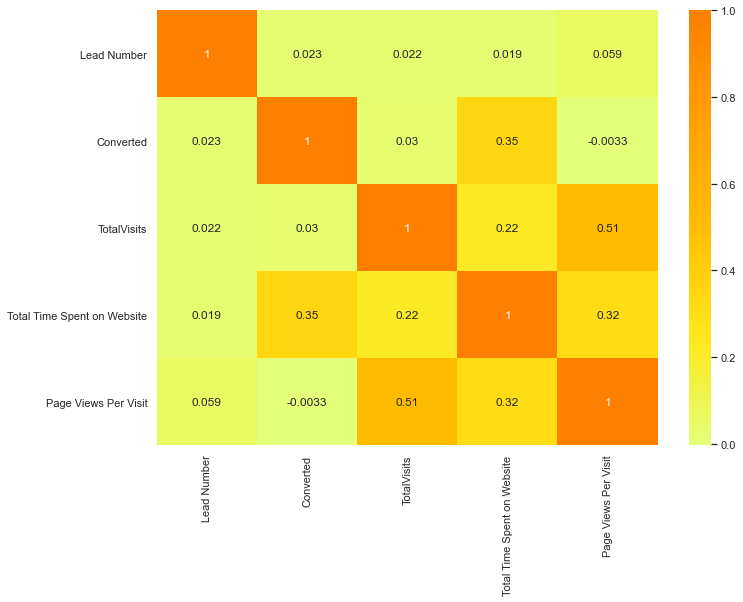

In [77]:
# Correlation heatmap of numercial variables
plt.figure(figsize = (10,8))
sns.heatmap(lead.corr(), annot = True, cmap="Wistia")
plt.show()

- We need to cap the outliers so that our model performs better

In [78]:
# Quantiles of numerical column
lead.quantile([0.9,0.92,.95, .97, .98, .99,1.0], axis = 0)

Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
0.90  650254.00    1.0        7.0          1372.00                       
0.92  652546.12    1.0        8.0          1444.84                       
0.95  655337.90    1.0        10.0         1556.90                       
0.97  657380.88    1.0        11.0         1654.88                       
0.98  658469.52    1.0        13.0         1725.96                       
0.99  659561.86    1.0        17.0         1838.96                       
1.00  660737.00    1.0        251.0        2272.00                       

      Page Views Per Visit  
0.90  5.0                   
0.92  5.0                   
0.95  6.0                   
0.97  7.0                   
0.98  8.0                   
0.99  9.0                   
1.00  55.0

In [79]:
# Capping 'TotalVisits' and 'Page Views Per Visit' to 99 percentile.
q1 = lead['TotalVisits'].quantile(0.99)
q2 = lead['Page Views Per Visit'].quantile(0.99)

lead['TotalVisits'][lead['TotalVisits']>= q1] = q1
lead['Page Views Per Visit'][lead['Page Views Per Visit']>= q2] = q2

## 4. Modelling

In [80]:
# copying data frame for future reference
lead_df = lead.copy()
lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620  660737       API                       
1  2a272436-5132-4136-86fa-dcc88c88f482  660728       API                       
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  660727       Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  660719       Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  660681       Landing Page Submission   

      Lead Source  Converted  TotalVisits  Total Time Spent on Website  \
0  Olark Chat      0          0.0          0                             
1  Organic Search  0          5.0          674                           
2  Direct Traffic  1          2.0          1532                          
3  Direct Traffic  0          1.0          305                           
4  Google          1          2.0          1428                          

   Page Views Per Visit            Last Activity           Specialization  \
0  0.0                   Page Visited on Website  Others                    
1  2.5                   Email Opened             Others                    
2  2.0                   Email Opened             Business Administration   
3  1.0                   Unreachable              Media and Advertising     
4  1.0                   Converted to Lead        Others                    

  What is your current occupation                                 Tags  \
0  Unemployed                      Interested in other courses           
1  Unemployed                      Ringing                               
2  Student                         Will revert after reading the email   
3  Unemployed                      Ringing                               
4  Unemployed                      Will revert after reading the email   

     City A free copy of Mastering The Interview Last Notable Activity  
0  Mumbai  No                                     Modified              
1  Mumbai  No                                     Email Opened          
2  Mumbai  Yes                                    Email Opened          
3  Mumbai  No                                     Modified              
4  Mumbai  No                                     Modified

- Converting columns with 'yes' and 'no' values to '1' and '0'

In [81]:
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

# Applying the function
lead_df[['A free copy of Mastering The Interview']] = lead_df[['A free copy of Mastering The Interview']].apply(binary_map)
lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620  660737       API                       
1  2a272436-5132-4136-86fa-dcc88c88f482  660728       API                       
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  660727       Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  660719       Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  660681       Landing Page Submission   

      Lead Source  Converted  TotalVisits  Total Time Spent on Website  \
0  Olark Chat      0          0.0          0                             
1  Organic Search  0          5.0          674                           
2  Direct Traffic  1          2.0          1532                          
3  Direct Traffic  0          1.0          305                           
4  Google          1          2.0          1428                          

   Page Views Per Visit            Last Activity           Specialization  \
0  0.0                   Page Visited on Website  Others                    
1  2.5                   Email Opened             Others                    
2  2.0                   Email Opened             Business Administration   
3  1.0                   Unreachable              Media and Advertising     
4  1.0                   Converted to Lead        Others                    

  What is your current occupation                                 Tags  \
0  Unemployed                      Interested in other courses           
1  Unemployed                      Ringing                               
2  Student                         Will revert after reading the email   
3  Unemployed                      Ringing                               
4  Unemployed                      Will revert after reading the email   

     City  A free copy of Mastering The Interview Last Notable Activity  
0  Mumbai  0                                       Modified              
1  Mumbai  0                                       Email Opened          
2  Mumbai  1                                       Email Opened          
3  Mumbai  0                                       Modified              
4  Mumbai  0                                       Modified

- We shall create dummy variables for all the remaining categorical columns

In [82]:
# dummies for categorical columns
dummy = pd.get_dummies(lead_df[['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation','Tags','Last Notable Activity',
                                'Specialization','City']], drop_first=True)
dummy.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0  0                                    0                           
1  0                                    0                           
2  1                                    0                           
3  1                                    0                           
4  1                                    0                           

   Lead Origin_Lead Import  Lead Source_Google  Lead Source_Live Chat  \
0  0                        0                   0                       
1  0                        0                   0                       
2  0                        0                   0                       
3  0                        0                   0                       
4  0                        1                   0                       

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
0  1                       0                           0                    
1  0                       1                           0                    
2  0                       0                           0                    
3  0                       0                           0                    
4  0                       0                           0                    

   Lead Source_Reference  Lead Source_Referral Sites  \
0  0                      0                            
1  0                      0                            
2  0                      0                            
3  0                      0                            
4  0                      0                            

   Lead Source_Social Media  Lead Source_Welingak Website  \
0  0                         0                              
1  0                         0                              
2  0                         0                              
3  0                         0                              
4  0                         0                              

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0  0                            0                                  
1  0                            0                                  
2  0                            0                                  
3  0                            0                                  
4  0                            0                                  

   Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
0  0                           0                                         
1  1                           0                                         
2  1                           0                                         
3  0                           0                                         
4  0                           0                                         

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0  0                                      0                      
1  0                                      0                      
2  0                                      0                      
3  0                                      0                      
4  0                                      0                      

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0  1                                      0                        
1  0                                      0                        
2  0                                      0                        
3  0                                      0                        
4  0                                      0                        

   Last Activity_Unreachable  What is your current occupation_Housewife  \
0  0                          0                                           
1  0                          0                                           
2  0                          0                                           
3  1                  

In [83]:
# concatenating dataframes
lead_df = pd.concat([lead_df, dummy], axis=1)
lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620  660737       API                       
1  2a272436-5132-4136-86fa-dcc88c88f482  660728       API                       
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  660727       Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  660719       Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  660681       Landing Page Submission   

      Lead Source  Converted  TotalVisits  Total Time Spent on Website  \
0  Olark Chat      0          0.0          0                             
1  Organic Search  0          5.0          674                           
2  Direct Traffic  1          2.0          1532                          
3  Direct Traffic  0          1.0          305                           
4  Google          1          2.0          1428                          

   Page Views Per Visit            Last Activity           Specialization  \
0  0.0                   Page Visited on Website  Others                    
1  2.5                   Email Opened             Others                    
2  2.0                   Email Opened             Business Administration   
3  1.0                   Unreachable              Media and Advertising     
4  1.0                   Converted to Lead        Others                    

  What is your current occupation                                 Tags  \
0  Unemployed                      Interested in other courses           
1  Unemployed                      Ringing                               
2  Student                         Will revert after reading the email   
3  Unemployed                      Ringing                               
4  Unemployed                      Will revert after reading the email   

     City  A free copy of Mastering The Interview Last Notable Activity  \
0  Mumbai  0                                       Modified               
1  Mumbai  0                                       Email Opened           
2  Mumbai  1                                       Email Opened           
3  Mumbai  0                                       Modified               
4  Mumbai  0                                       Modified               

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0  0                                    0                           
1  0                                    0                           
2  1                                    0                           
3  1                                    0                           
4  1                                    0                           

   Lead Origin_Lead Import  Lead Source_Google  Lead Source_Live Chat  \
0  0                        0                   0                       
1  0                        0                   0                       
2  0                        0                   0                       
3  0                        0                   0                       
4  0                        1                   0                       

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
0  1                       0                           0                    
1  0                       1                           0                    
2  0                       0                           0                    
3  0                       0                           0                    
4  0                       0                           0                    

   Lead Source_Reference  Lead Source_Referral Sites  \
0  0                      0                            
1  0                      0                            
2  0                      0                            
3  0                      0                            
4  0                      0                            

   Lead Source_Social Media  Lead Source_Welingak Website  \
0  0                  

In [84]:
# Dropping the original columns after dummification
lead_df_original= lead_df.copy()
lead_df = lead_df.drop(['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation',
                       'Tags','Last Notable Activity','Specialization','City'], axis = 1)
lead_df.drop(['Prospect ID','Lead Number'],1,inplace=True)
lead_df.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0  0          0.0          0                            0.0                    
1  0          5.0          674                          2.5                    
2  1          2.0          1532                         2.0                    
3  0          1.0          305                          1.0                    
4  1          2.0          1428                         1.0                    

   A free copy of Mastering The Interview  \
0  0                                        
1  0                                        
2  1                                        
3  0                                        
4  0                                        

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0  0                                    0                           
1  0                                    0                           
2  1                                    0                           
3  1                                    0                           
4  1                                    0                           

   Lead Origin_Lead Import  Lead Source_Google  Lead Source_Live Chat  \
0  0                        0                   0                       
1  0                        0                   0                       
2  0                        0                   0                       
3  0                        0                   0                       
4  0                        1                   0                       

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
0  1                       0                           0                    
1  0                       1                           0                    
2  0                       0                           0                    
3  0                       0                           0                    
4  0                       0                           0                    

   Lead Source_Reference  Lead Source_Referral Sites  \
0  0                      0                            
1  0                      0                            
2  0                      0                            
3  0                      0                            
4  0                      0                            

   Lead Source_Social Media  Lead Source_Welingak Website  \
0  0                         0                              
1  0                         0                              
2  0                         0                              
3  0                         0                              
4  0                         0                              

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0  0                            0                                  
1  0                            0                                  
2  0                            0                                  
3  0                            0                                  
4  0                            0                                  

   Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
0  0                           0                                         
1  1                           0                                         
2  1                           0                                         
3  0                           0                                         
4  0                           0                                         

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0  0                                      0                      
1  0                                      0                      
2  0                                      0                      
3  0                                      0                      
4  0                                      0   

In [85]:
# Creating X,y
from sklearn.model_selection import train_test_split

X = lead_df.drop(['Converted'], axis=1)
y = lead_df['Converted']

In [86]:
# Splitting the dataset to 70% train and 30% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [87]:
# Scaling X_train
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
7962 -0.105932     1.476324                    -0.420056               
5520  1.113025    -0.771066                     2.354047               
1962  0.503547    -0.571257                     0.084327               
1566  3.246199     1.393834                     0.588709               
9170 -1.020149    -0.881052                    -1.176630               

      A free copy of Mastering The Interview  \
7962  0                                        
5520  0                                        
1962  0                                        
1566  0                                        
9170  0                                        

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
7962  1                                    0                           
5520  1                                    0                           
1962  1                                    0                           
1566  1                                    0                           
9170  0                                    0                           

      Lead Origin_Lead Import  Lead Source_Google  Lead Source_Live Chat  \
7962  0                        1                   0                       
5520  0                        0                   0                       
1962  0                        1                   0                       
1566  0                        1                   0                       
9170  0                        0                   0                       

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
7962  0                       0                           0                    
5520  0                       0                           0                    
1962  0                       0                           0                    
1566  0                       0                           0                    
9170  1                       0                           0                    

      Lead Source_Reference  Lead Source_Referral Sites  \
7962  0                      0                            
5520  0                      0                            
1962  0                      0                            
1566  0                      0                            
9170  0                      0                            

      Lead Source_Social Media  Lead Source_Welingak Website  \
7962  0                         0                              
5520  0                         0                              
1962  0                         0                              
1566  0                         0                              
9170  0                         0                              

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
7962  0                            0                                  
5520  0                            0                                  
1962  0                            0                                  
1566  0                            0                                  
9170  0                            0                                  

      Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
7962  0                           0                                         
5520  1                           0                                         
1962  0                           0                                         
1566  1                           0                                         
9170  1                           0                                         

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
7962  0                                      0                      
5520  0                                      0                      
1962  0                                      0                      
1566  0

In [88]:
# RFE to reduce number of variables to 15
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X_train, y_train)

In [89]:
# Columns chosen by RFE
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Unknown', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

### Model 1

In [90]:
# Logistic regression using statsmodel
# Model 1
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1254.3
Date:                Mon, 26 Oct 2020   Deviance:                       2508.6
Time:                        17:05:27   Pearson chi2:                 8.17e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.6782      0.204    -18.068      0.000      -4.077      -3.279
Total Time Spent on Website                       1.0776      0.060     17.864      0.000       0.959       1.196
Lead Origin_Lead Add Form                         2.0778      0.422      4.922      0.000       1.250       2.905
Lead Source_Olark Chat                            1.2318      0.146      8.446      0.000       0.946       1.518
Lead Source_Welingak Website                      3.4514      0.842      4.101      0.000       1.802       5.101
Last Activity_SMS Sent                            1.9025      0.116     16.413      0.000       1.675       2.130
Tags_Busy                                         2.5646      0.295      8.708      0.000       1.987       3.142
Tags_Closed by Horizzon                           8.6962      0.755     11.516      0.000       7.216      10.176
Tags_Lost to EINS                                 8.3736      0.753     11.118      0.000       6.897       9.850
Tags_Not doing further education                 -0.8706      1.034     -0.842      0.400      -2.896       1.155
Tags_Ringing                                     -1.3969      0.302     -4.628      0.000      -1.988      -0.805
Tags_Unknown                                      2.0432      0.201     10.166      0.000       1.649       2.437
Tags_Will revert after reading the email          6.6594      0.264     25.258      0.000       6.143       7.176
Tags_switched off                                -1.5650      0.633     -2.473      0.013      -2.805      -0.325
Last Notable Activity_Modified                   -1.7019      0.127    -13.436      0.000      -1.950      -1.454
Last Notable Activity_Olark Chat Conversation    -1.6558      0.403     -4.111      0.000      -2.445      -0.866
=================================================================================================================
"""

In [91]:
# predicted values
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.453922
5520    0.125156
1962    0.003476
1566    0.988829
9170    0.032428
5097    0.205460
8954    0.033648
309     0.927662
5519    0.634130
1050    0.984976
dtype: float64

In [92]:
# converting predicted values dataframe to array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.45392193, 0.1251563 , 0.00347645, 0.98882896, 0.03242825,
       0.20545974, 0.03364782, 0.92766241, 0.63412962, 0.98497568])

In [93]:
# Data frame with predicted converted probabilty
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_prob  Lead ID
0  0          0.453922        7962   
1  0          0.125156        5520   
2  0          0.003476        1962   
3  1          0.988829        1566   
4  0          0.032428        9170

In [94]:
# Creating new column 'predicted' with 1 if Converted_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_prob  Lead ID  predicted
0  0          0.453922        7962     0        
1  0          0.125156        5520     0        
2  0          0.003476        1962     0        
3  1          0.988829        1566     1        
4  0          0.032428        9170     0

In [95]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3784  169]
 [ 297 2122]]


In [96]:
# Printing accuracy score
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9268675455116133


In [97]:
# Checking VIF for each variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1   Lead Origin_Lead Add Form                      1.84
4   Last Activity_SMS Sent                         1.66
11  Tags_Will revert after reading the email       1.65
10  Tags_Unknown                                   1.64
2   Lead Source_Olark Chat                         1.60
0   Total Time Spent on Website                    1.45
13  Last Notable Activity_Modified                 1.44
3   Lead Source_Welingak Website                   1.37
6   Tags_Closed by Horizzon                        1.23
9   Tags_Ringing                                   1.13
14  Last Notable Activity_Olark Chat Conversation  1.08
7   Tags_Lost to EINS                              1.06
5   Tags_Busy                                      1.05
8   Tags_Not doing further education               1.03
12  Tags_switched off                              1.03

- We saw that 'Tags_Not doing further education' has high p value so we shall drop it.

### Model 2

In [98]:
col2 = col.drop('Tags_Not doing further education',1)

In [99]:
# Model 2
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1254.8
Date:                Mon, 26 Oct 2020   Deviance:                       2509.5
Time:                        17:05:30   Pearson chi2:                 8.20e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.7233      0.200    -18.648      0.000      -4.115      -3.332
Total Time Spent on Website                       1.0781      0.060     17.870      0.000       0.960       1.196
Lead Origin_Lead Add Form                         2.0834      0.423      4.925      0.000       1.254       2.912
Lead Source_Olark Chat                            1.2350      0.146      8.464      0.000       0.949       1.521
Lead Source_Welingak Website                      3.4475      0.842      4.094      0.000       1.797       5.098
Last Activity_SMS Sent                            1.9062      0.116     16.445      0.000       1.679       2.133
Tags_Busy                                         2.6074      0.292      8.922      0.000       2.035       3.180
Tags_Closed by Horizzon                           8.7411      0.754     11.591      0.000       7.263      10.219
Tags_Lost to EINS                                 8.4193      0.752     11.194      0.000       6.945       9.893
Tags_Ringing                                     -1.3558      0.300     -4.523      0.000      -1.943      -0.768
Tags_Unknown                                      2.0864      0.197     10.565      0.000       1.699       2.473
Tags_Will revert after reading the email          6.7045      0.261     25.717      0.000       6.193       7.215
Tags_switched off                                -1.5233      0.632     -2.411      0.016      -2.762      -0.285
Last Notable Activity_Modified                   -1.7039      0.127    -13.454      0.000      -1.952      -1.456
Last Notable Activity_Olark Chat Conversation    -1.6543      0.403     -4.106      0.000      -2.444      -0.865
=================================================================================================================
"""

In [100]:
# predicted values
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.443886
5520    0.124852
1962    0.003470
1566    0.988837
9170    0.031123
5097    0.205570
8954    0.033636
309     0.927643
5519    0.635149
1050    0.984984
dtype: float64

In [101]:
# converting predicted value dataframe to array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.44388578, 0.12485187, 0.00346981, 0.98883682, 0.03112259,
       0.20557046, 0.03363637, 0.92764287, 0.635149  , 0.9849839 ])

In [102]:
# # Data frame with predicted converted probabilty
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_prob  Lead ID
0  0          0.443886        7962   
1  0          0.124852        5520   
2  0          0.003470        1962   
3  1          0.988837        1566   
4  0          0.031123        9170

In [103]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_prob  Lead ID  predicted
0  0          0.443886        7962     0        
1  0          0.124852        5520     0        
2  0          0.003470        1962     0        
3  1          0.988837        1566     1        
4  0          0.031123        9170     0

In [104]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3784  169]
 [ 297 2122]]


In [105]:
# Accuracy score
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9268675455116133


- There is no such drop in accuracy score after dropping 'Tags_Not doing further education' column

In [106]:
# Checking VIF for each variable
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1   Lead Origin_Lead Add Form                      1.84
4   Last Activity_SMS Sent                         1.66
10  Tags_Will revert after reading the email       1.65
9   Tags_Unknown                                   1.63
2   Lead Source_Olark Chat                         1.60
0   Total Time Spent on Website                    1.45
12  Last Notable Activity_Modified                 1.40
3   Lead Source_Welingak Website                   1.37
6   Tags_Closed by Horizzon                        1.23
8   Tags_Ringing                                   1.13
13  Last Notable Activity_Olark Chat Conversation  1.08
7   Tags_Lost to EINS                              1.06
5   Tags_Busy                                      1.05
11  Tags_switched off                              1.03

### Model Evaluation

- This model seems to be optimal with no high p values and no high VIF scores. We shall keep this model for further analysis

In [107]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [108]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8772219925589086

- Specificity is what we are looking for as we want most of the 1s to be predicted as 1s and we are fine with 0 being converted as 1
- We get a good specificity score of 0.87

In [109]:
# Let us calculate specificity
TN / float(TN+FP)

0.9572476600050595

In [110]:
# Calculate false postive rate - predicting conversion when customer has not converted
print(FP/ float(TN+FP))

0.042752339994940554


In [111]:
# positive predictive value 
print (TP / float(TP+FP))

0.9262330859886513


In [112]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9272237196765498


In [113]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

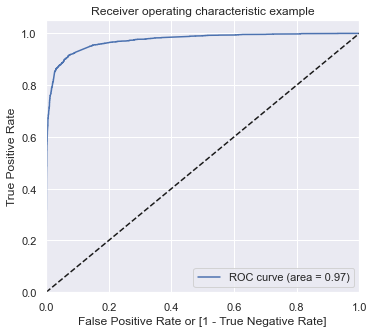

In [114]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

- We get AUC as 0.97

In [115]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_prob  Lead ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0  0          0.443886        7962     0          1    1    1    1    1     
1  0          0.124852        5520     0          1    1    0    0    0     
2  0          0.003470        1962     0          1    0    0    0    0     
3  1          0.988837        1566     1          1    1    1    1    1     
4  0          0.031123        9170     0          1    0    0    0    0     

   0.5  0.6  0.7  0.8  0.9  
0  0    0    0    0    0    
1  0    0    0    0    0    
2  0    0    0    0    0    
3  1    1    1    1    1    
4  0    0    0    0    0

In [116]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0  0.0   0.379630  1.000000  0.000000
0.1  0.1   0.835217  0.970236  0.752593
0.2  0.2   0.895009  0.949153  0.861877
0.3  0.3   0.922473  0.915254  0.926891
0.4  0.4   0.925298  0.899132  0.941310
0.5  0.5   0.926868  0.877222  0.957248
0.6  0.6   0.926711  0.855726  0.970149
0.7  0.7   0.913842  0.807358  0.979003
0.8  0.8   0.904739  0.776354  0.983304
0.9  0.9   0.886378  0.717652  0.989628


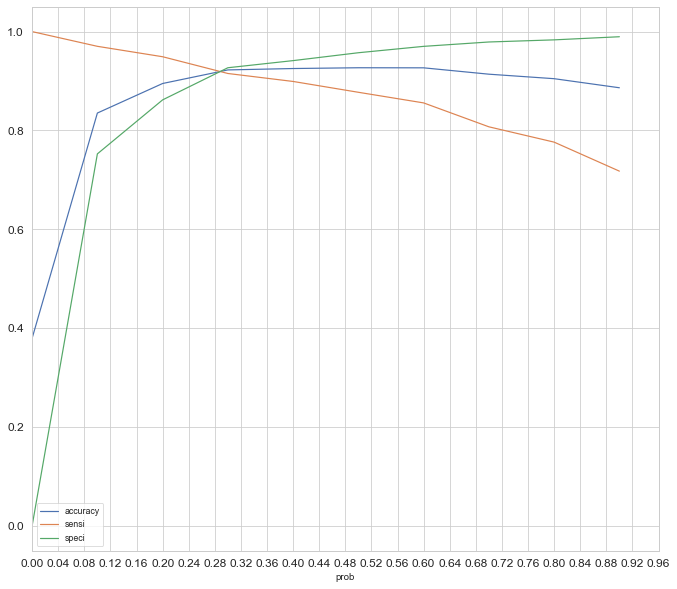

In [117]:
# plot to find out the right threshold
sns.set_style("whitegrid") 
sns.set_context("paper") 
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(10,10))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.04), size = 12, )
plt.yticks(size = 12)
plt.show()


- 0.28 seems to be the right thershold

In [118]:
# Creating new column 'final_predicted' with 1 if Converted_prob > 0.28 else 0
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.28 else 0)

y_train_pred_final.head()

Converted  Converted_prob  Lead ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0  0          0.443886        7962     0          1    1    1    1    1     
1  0          0.124852        5520     0          1    1    0    0    0     
2  0          0.003470        1962     0          1    0    0    0    0     
3  1          0.988837        1566     1          1    1    1    1    1     
4  0          0.031123        9170     0          1    0    0    0    0     

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0  0    0    0    0    0    1                
1  0    0    0    0    0    0                
2  0    0    0    0    0    0                
3  1    1    1    1    1    1                
4  0    0    0    0    0    0

In [119]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9218455743879472

In [120]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion1

array([[3658,  295],
       [ 203, 2216]], dtype=int64)

In [121]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [122]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9160810252170318

- We get a very good sensitivity value of 0.91

In [123]:
# Let us calculate specificity
TN / float(TN+FP)

0.9253731343283582

In [124]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.07462686567164178


In [125]:
# positive predictive value 
print (TP / float(TP+FP))

0.8825169255276782


In [126]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9474229474229474


#### Precision Recall and its tradeoff

In [127]:
# Precision
from sklearn.metrics import precision_score, recall_score
precision=precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
precision

0.9262330859886513

In [128]:
# Recall
recall=recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
recall

0.8772219925589086

In [129]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

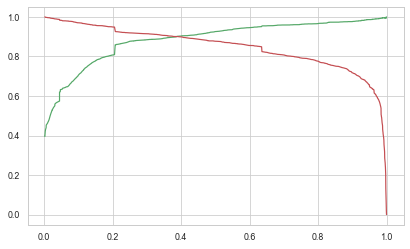

In [130]:
# Precision Recall tradeoff
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

- We can take 0.4 as threshold to get a very good precision and recall score but out main aim is to achieve 80% of conversion rate which we have already obtained by getting a good sensitivity with 0.28 as threshold

In [131]:
# F1 score
F1 = 2*(precision*recall)/(precision+recall)
F1

0.9010615711252654

### Prediction on test data

In [132]:
# scaling X_test
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
7962 -0.105932     1.476324                    -0.420056               
5520  1.113025    -0.771066                     2.354047               
1962  0.503547    -0.571257                     0.084327               
1566  3.246199     1.393834                     0.588709               
9170 -1.020149    -0.881052                    -1.176630               

      A free copy of Mastering The Interview  \
7962  0                                        
5520  0                                        
1962  0                                        
1566  0                                        
9170  0                                        

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
7962  1                                    0                           
5520  1                                    0                           
1962  1                                    0                           
1566  1                                    0                           
9170  0                                    0                           

      Lead Origin_Lead Import  Lead Source_Google  Lead Source_Live Chat  \
7962  0                        1                   0                       
5520  0                        0                   0                       
1962  0                        1                   0                       
1566  0                        1                   0                       
9170  0                        0                   0                       

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
7962  0                       0                           0                    
5520  0                       0                           0                    
1962  0                       0                           0                    
1566  0                       0                           0                    
9170  1                       0                           0                    

      Lead Source_Reference  Lead Source_Referral Sites  \
7962  0                      0                            
5520  0                      0                            
1962  0                      0                            
1566  0                      0                            
9170  0                      0                            

      Lead Source_Social Media  Lead Source_Welingak Website  \
7962  0                         0                              
5520  0                         0                              
1962  0                         0                              
1566  0                         0                              
9170  0                         0                              

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
7962  0                            0                                  
5520  0                            0                                  
1962  0                            0                                  
1566  0                            0                                  
9170  0                            0                                  

      Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
7962  0                           0                                         
5520  1                           0                                         
1962  0                           0                                         
1566  1                           0                                         
9170  1                           0                                         

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
7962  0                                      0                      
5520  0                                      0                      
1962  0                                      0                      
1566  0

In [133]:
X_test = X_test[col2]

In [134]:
X_test_sm = sm.add_constant(X_test)

In [135]:
# prediction on x_test
y_test_pred = res.predict(X_test_sm)

In [136]:
# predicted values
y_test_pred[:10]

3504    0.005536
4050    0.997578
7201    0.204267
1196    0.005525
8219    0.985716
8747    0.205570
9048    0.698500
6524    0.002383
7693    0.077524
8187    0.115126
dtype: float64

In [137]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [138]:
# Let's see the head
y_pred_1.head()

0
3504  0.005536
4050  0.997578
7201  0.204267
1196  0.005525
8219  0.985716

In [139]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [140]:
# Putting Lead ID to index
y_test_df['Lead ID'] = y_test_df.index

In [141]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [142]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [143]:
y_pred_final.head()

Converted  Lead ID         0
0  0          3504     0.005536
1  1          4050     0.997578
2  0          7201     0.204267
3  0          1196     0.005525
4  1          8219     0.985716

In [144]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [145]:
# Let's see the head of y_pred_final
y_pred_final.head()

Converted  Lead ID  Converted_prob
0  0          3504     0.005536      
1  1          4050     0.997578      
2  0          7201     0.204267      
3  0          1196     0.005525      
4  1          8219     0.985716

In [146]:
# Using 0.28 threshold to create 'final_predicted' column
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.28 else 0)

In [147]:
y_pred_final.head()

Converted  Lead ID  Converted_prob  final_predicted
0  0          3504     0.005536        0              
1  1          4050     0.997578        1              
2  0          7201     0.204267        0              
3  0          1196     0.005525        0              
4  1          8219     0.985716        1

### Evaluation on test data

In [148]:
# Let's check the overall accuracy for test data
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9245697546686196

In [149]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1562,  127],
       [  79,  963]], dtype=int64)

In [150]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [151]:
# Let's see the sensitivity of our test data
TP / float(TP+FN)

0.9241842610364683

- We get a very good sensitivity score

In [152]:
# Let us calculate specificity
TN / float(TN+FP)

0.9248075784487862

In [153]:
from sklearn.metrics import precision_score, recall_score
precision=precision_score(y_pred_final.Converted, y_pred_final.final_predicted)
precision

0.8834862385321101

In [154]:
recall=recall_score(y_pred_final.Converted, y_pred_final.final_predicted)
recall

0.9241842610364683

In [155]:
F1 = 2*(precision*recall)/(precision+recall)
F1

0.9033771106941839

In [156]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

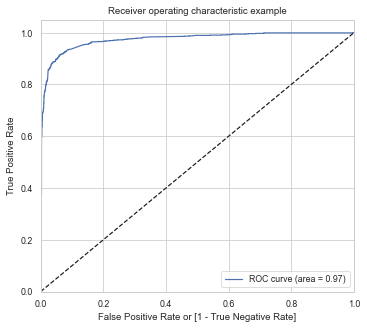

In [157]:
draw_roc(y_pred_final.Converted, y_pred_final.Converted_prob)

- We get AUC for test data set as 0.97

#### Concatenating train and test prediction

In [158]:
lead_train_pred= y_train_pred_final[['Converted','Converted_prob','Lead ID','final_predicted']]
lead_train_pred.head()

Converted  Converted_prob  Lead ID  final_predicted
0  0          0.443886        7962     1              
1  0          0.124852        5520     0              
2  0          0.003470        1962     0              
3  1          0.988837        1566     1              
4  0          0.031123        9170     0

In [159]:
lead_test_pred= y_pred_final[['Converted','Converted_prob','Lead ID','final_predicted']]
lead_test_pred.head()

Converted  Converted_prob  Lead ID  final_predicted
0  0          0.005536        3504     0              
1  1          0.997578        4050     1              
2  0          0.204267        7201     0              
3  0          0.005525        1196     0              
4  1          0.985716        8219     1

In [160]:
# concatenation of train and test prediction
lead_full_pred = pd.concat([lead_train_pred,lead_test_pred],axis=0)
lead_full_pred.head()

Converted  Converted_prob  Lead ID  final_predicted
0  0          0.443886        7962     1              
1  0          0.124852        5520     0              
2  0          0.003470        1962     0              
3  1          0.988837        1566     1              
4  0          0.031123        9170     0

In [161]:
# dimension of concatenated data frame
lead_full_pred.shape

(9103, 4)

In [162]:
# Giving a Lead Score to each customer which is nothing but Converted_prob*100
lead_full_pred['Lead_Score'] = lead_full_pred['Converted_prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

Converted  Converted_prob  Lead ID  final_predicted  Lead_Score
0  0          0.443886        7962     1                44        
1  0          0.124852        5520     0                12        
2  0          0.003470        1962     0                0         
3  1          0.988837        1566     1                99        
4  0          0.031123        9170     0                3

#### Concatenating Lead Number to the data frame. This is done so that Lead Score is associated to the Lead Number of each Lead. This will help in quick identification of the lead.

In [163]:
leads = lead_df_original[['Lead Number']]
leads.shape

(9103, 1)

In [164]:
lead_full_pred = lead_full_pred.set_index('Lead ID')
lead_full_pred.head()

Converted  Converted_prob  final_predicted  Lead_Score
Lead ID                                                        
7962     0          0.443886        1                44        
5520     0          0.124852        0                12        
1962     0          0.003470        0                0         
1566     1          0.988837        1                99        
9170     0          0.031123        0                3

In [165]:
# concatenating lead score to lead number
leads_final = pd.concat([leads, lead_full_pred], axis=1).sort_index(axis = 0, ascending = True)
leads_final.head(10)

Lead Number  Converted  Converted_prob  final_predicted  Lead_Score
0  660737       0          0.005812        0                1         
1  660728       0          0.009041        0                1         
2  660727       1          0.993688        1                99        
3  660719       0          0.000800        0                0         
4  660681       1          0.958894        1                96        
5  660680       0          0.044973        0                4         
6  660673       1          0.972578        1                97        
7  660664       0          0.044973        0                4         
8  660624       0          0.079694        0                8         
9  660616       0          0.077830        0                8

In [166]:
new_params = res.params[1:]
new_params.sort_values()

Last Notable Activity_Modified                  -1.703852
Last Notable Activity_Olark Chat Conversation   -1.654288
Tags_switched off                               -1.523333
Tags_Ringing                                    -1.355782
Total Time Spent on Website                      1.078145
Lead Source_Olark Chat                           1.235001
Last Activity_SMS Sent                           1.906206
Lead Origin_Lead Add Form                        2.083367
Tags_Unknown                                     2.086369
Tags_Busy                                        2.607359
Lead Source_Welingak Website                     3.447523
Tags_Will revert after reading the email         6.704457
Tags_Lost to EINS                                8.419298
Tags_Closed by Horizzon                          8.741108
dtype: float64

The above shows those variables that matter the most in conversion of lead along with their coeffecients. 

## Conclusion

- We saw cutoff or threshold for our model based on both sensitivity, specificity and precesion, recall. ​

- We decided to go with senistivity, specificity cutoff as our main intention is to accurately predict all those who have converted and sensitivity is the best measure.​

- We saw different accuracy, sensitivity, precision, specificity, F1 and AUC score for both train and test data and our model seems to be good.​

- We concatenated the Lead Number to Predicted scores. This is done so that the lead score or predicted score is associated with every Lead Number (lead number represents a lead). This will help quick identification of lead.

Top 3 features contributing to the lead getting converted are
- Tags_Closed by Horizzon
- Tags_Lost to EINS
- Tags_Will revert after reading the email

Model Performance for train data set
- Accuracy: 0.921
- Sensitivity: 0.916
- Specificity: 0.925
- Precision: 0.926
- AUC: 0.97
- F1 score: 0.901

Model Performance for test data set
- Accuracy: 0.924
- Sensitivity: 0.924
- Specificity: 0.924
- Precision: 0.883
- AUC: 0.97
- F1 score: 0.903